# Understand Model Behavior During Training By Plotting History
You can learn a lot about our models by observing their performance over time during training. Discover how you can review and visualize the performance of deep learning models over time during training with Keras.
- inspect the history metrics 
- Plot accuracy metrics on training and testing sets 
- Plot model loss metrics on training and testing sets

### Access Model Training History
Keras provides the capability to register callbacks when training a deep learning model. One of the default callbacks that is registered when training all deep learning models is the **History** callback. It records **training metrics for each epoch**.
- This includes the loss and the accuracy (for classiﬁcation problems) as well as the loss and accuracy for the validation dataset, if one is set. 

The history object is returned from calls to the **`fit()`** function used to train the model. Metrics are stored in a **dictionary** in the history member of the object returned. For example, you can list the metrics collected in a history object using the following snippet of code after a model is trained:

In [ ]:
# list all data in history
print(history.history.keys())

For example, for a model trained on a classiﬁcation problem with a validation dataset, this might produce the following listing:

['loss', 'acc', 'val_loss', 'val_acc']

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
from keras.models import Sequential 
from keras.layers import Dense 

np.random.seed(47)
df = pd.read_csv('pima-indians-diabetes.csv', header=None)
data = df.values

X = data[:,0:8] 
y = data[:,8]

model = Sequential() 
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu')) 
model.add(Dense(8, kernel_initializer='uniform', activation='relu')) 
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Using TensorFlow backend.


### plots
We can use the data collected in the history object to create plots. The plots can provide an indication of useful things about the training of the model, such as:
- Its speed of convergence over epochs (slope).
- Whether the model may have already converged (plateau of the line).
- Whether the model may be over-learning the training data (inﬂection for validation line).
- And more.

This example below collects the history, returned from training the model and creates two charts:
- A plot of accuracy on the **training** and **validation** datasets over training epochs.
- A plot of loss on the **training** and **validation** datasets over training epochs.

dict_keys(['loss', 'acc', 'val_acc', 'val_loss'])


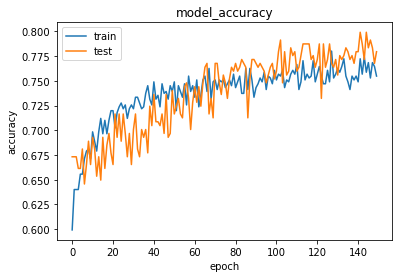

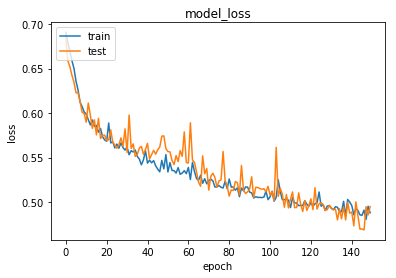

In [2]:
# Fit the model
history = model.fit(X, y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

# list all data in history 
print(history.history.keys()) 

# summarize history for accuracy 
plt.plot(history.history['acc']) 
plt.plot(history.history['val_acc']) 
plt.title('model_accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show() 

# summarize history for loss 
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('model_loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The history for the validation dataset is labeled test by convention as it is indeed a test dataset for the model. 

From the **plot of accuracy**, we can see that the model could probably be trained a little more as the trend for accuracy on both datasets is still rising for the last few epochs. We can also see that the model has not yet over-learned the training dataset, showing comparable skill on both datasets.

From the **plot of loss**, we can see that the model has comparable performance on both train and validation datasets (labeled test). If these parallel plots start to depart consistently, it might be a sign to stop training at an earlier epoch.

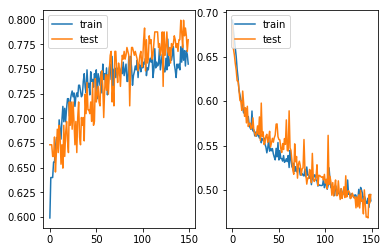

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=False)
ax1.plot(history.history['acc']) 
ax1.plot(history.history['val_acc']) 
ax1.legend(['train', 'test'], loc='upper left') 

ax2.plot(history.history['loss']) 
ax2.plot(history.history['val_loss']) 
ax2.legend(['train', 'test'], loc='upper left')


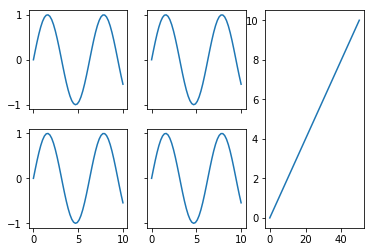

In [3]:
x = np.linspace(0,10)

fig, ((ax1, ax2, aux1), (ax3, ax4, aux2)) = plt.subplots(2, 3, sharex=True, sharey=True)

#turn rightmost 2 axes off
aux1.axis("off")
aux2.axis("off")

#create a new subplot at their position
ax5 = fig.add_subplot(133)

#plot stuff on the axes
ax1.plot(x,np.sin(x))
ax2.plot(x,np.sin(x))
ax3.plot(x,np.sin(x))
ax4.plot(x,np.sin(x))
ax5.plot(5*x,x)

plt.show()